## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Reading the dataSet

In [89]:
data=pd.read_csv("/content/data set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
data.shape

(614, 13)

In [91]:
data.size

7982

## Data Pre-processing

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling the Null Values

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#replacing + with space for filling the nan values
data['Dependents']=data['Dependents'].replace('3+',3)
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount']. mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


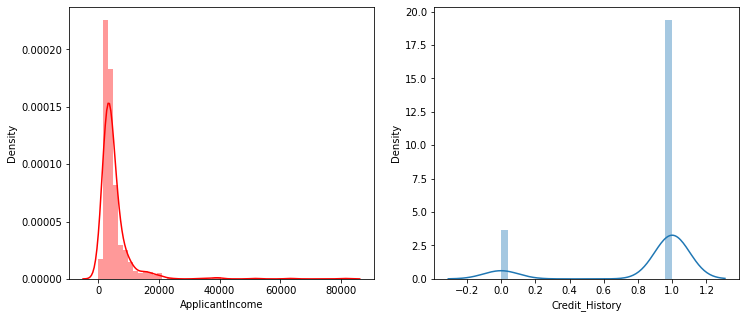

In [3]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


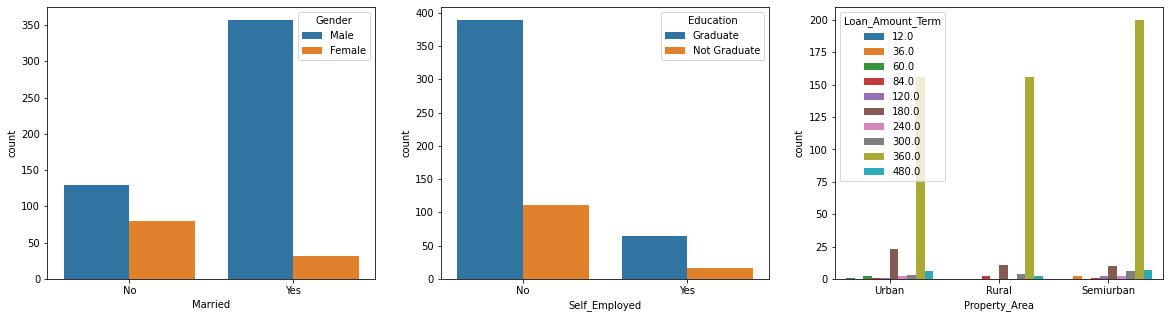

In [4]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


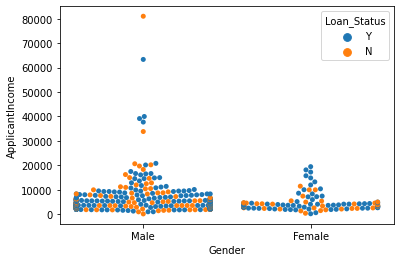

In [5]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

## Handling the categorical columns

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Married=le.fit_transform(data.Married)
data.Education=le.fit_transform(data.Education)
data.Self_Employed=le.fit_transform(data.Self_Employed)
data.Property_Area=le.fit_transform(data.Property_Area)

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [13]:
#changing the datype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

## ***Dividing Independent And Dependent Columns***

In [14]:
x=data.drop(['Loan_Status','Loan_ID'],axis=1)
y=data['Loan_Status']

In [15]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2


In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## ***Feature Scaling Using Standardization***

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.302759,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038731,-0.207648,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.944757,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.302759,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.053093,0.273231,0.411733,1.223298


# ***Dividing Into Train And Test Data***

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [118]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.040226,-0.554487,-1.206312,0.273231,0.411733,1.223298
272,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.421106,0.080632,-0.231426,0.273231,0.411733,-1.318513
474,0.472343,-1.372089,1.244745,-0.528362,-0.392601,0.021058,1.035190,0.196573,0.273231,0.411733,-1.318513
382,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,0.125240,0.273231,0.411733,1.223298
283,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.588536,0.015307,-1.087424,0.273231,0.411733,1.223298


In [20]:
y_train.head()

46     1
272    1
474    1
382    1
283    1
Name: Loan_Status, dtype: int64

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model1=rfc.fit(x_train,y_train)
y_pred_rfc=model1.predict(x_test)
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,y_pred_rfc)
a1

0.7922077922077922

## Descision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model2=dtc.fit(x_train,y_train)
y_pred_dtc=model2.predict(x_test)
a2=accuracy_score(y_test,y_pred_dtc)
a2

0.7337662337662337

## XGboost

In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model3=xgb.fit(x_train,y_train)
y_pred_xgb=model3.predict(x_test)
a3=accuracy_score(y_test,y_pred_xgb)
a3

0.8311688311688312

## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model4=knn.fit(x_train,y_train)
y_pred_knn=model4.predict(x_test)
a4=accuracy_score(y_test,y_pred_knn)
a4

0.8051948051948052

In [76]:
print("Accuracy score of RandomForestClassifier:",a1)
print("Accuaracy scorer of DecisionTreeClassifier:",a2)
print("Accuracy score of XGBClassifier:",a3)
print("Accuracy score of KNearestNeighbor:",a4)

Accuracy score of RandomForestClassifier: 0.7922077922077922
Accuaracy scorer of DecisionTreeClassifier: 0.7337662337662337
Accuracy score of XGBClassifier: 0.8311688311688312
Accuracy score of KNearestNeighbor: 0.8051948051948052


## ***Final Model***

In [93]:
# After checking all the models XGB Classifier is performing well
# So our final model si XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
model=xgb.fit(x_train,y_train)
y_pred_xgb=model3.predict(x_test)

## ***Evaluation Metrics***

In [94]:
accuracy_score(y_test,y_pred_xgb)

0.8311688311688312

In [95]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.82      0.97      0.89       111

    accuracy                           0.83       154
   macro avg       0.85      0.72      0.75       154
weighted avg       0.84      0.83      0.81       154



In [96]:
confusion_matrix=confusion_matrix(y_test,y_pred_xgb)
confusion_matrix

array([[ 20,  23],
       [  3, 108]])

Text(33.0, 0.5, 'predicted values')

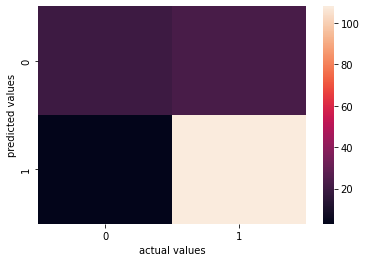

In [97]:
sns.heatmap(confusion_matrix)
plt.xlabel("actual values")
plt.ylabel("predicted values")

## ***Saving The Model***

In [126]:
import pickle

In [130]:
pickle.dump(model, open('Loan Prediction', 'wb'))

In [132]:
kranthi=pickle.load(open('Loan Prediction','rb'))

In [144]:
kranthi.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])